In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
df_train = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e4/sample_submission.csv')

In [18]:
df_train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [25]:
df_train.describe()


,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [26]:
df_train.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [27]:
df_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [28]:
df_sub.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [31]:
if 'id' in df_train.columns:
    df_train.drop(columns=['id'], inplace=True)

if 'id' in df_test.columns:
    df_test.drop(columns=['id'], inplace=True)



In [32]:
df_train.shape,df_test.shape

((750000, 11), (250000, 10))

In [33]:
df_train.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [34]:
df_train.dtypes

Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [35]:
df_train.shape,df_test.shape,df_sub.shape

((750000, 11), (250000, 10), (250000, 2))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


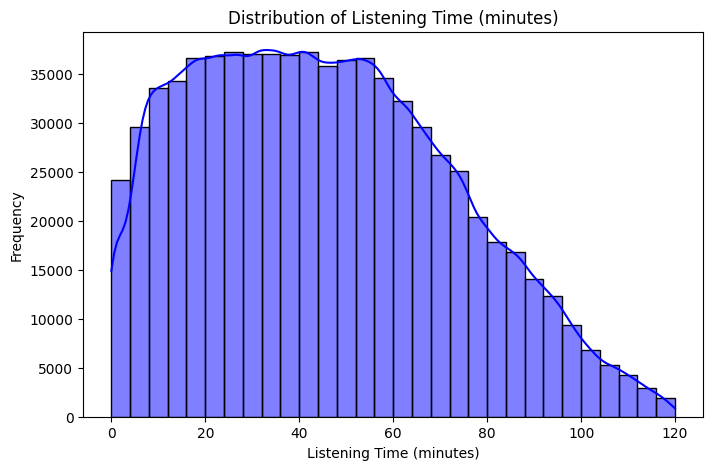

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_train['Listening_Time_minutes'], bins=30, kde=True, color='blue')
plt.title("Distribution of Listening Time (minutes)")
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Frequency")
plt.show()

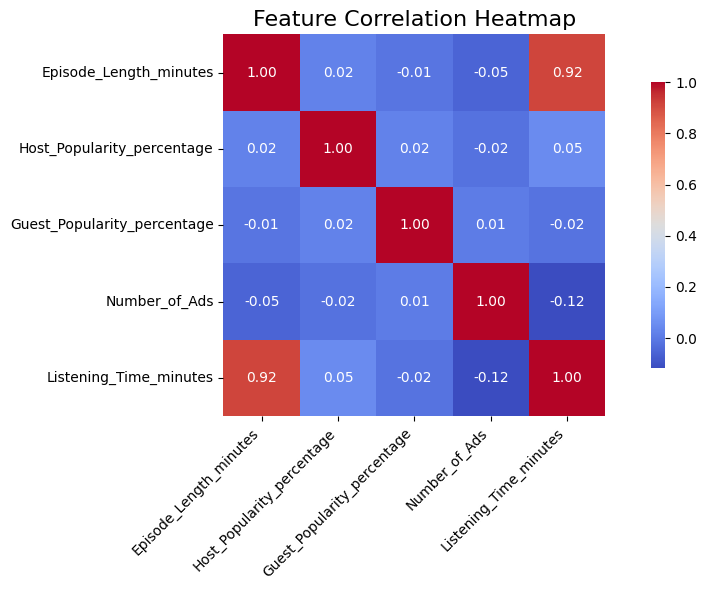

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Compute correlation matrix
corr_matrix = df_train.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .75})

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_train.select_dtypes(include=['object']).columns
label_encoders = {} 
for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col]) 
    label_encoders[col] = le  
df_train = df_train.astype(float)
df_test = df_test.astype(float)

print("Categorical columns converted to numerical successfully!")

Categorical columns converted to numerical successfully!


In [44]:
import pandas as pd

# Load the data
df_train = pd.read_csv('//kaggle/input/playground-series-s5e4/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')

# Separate the target variable
y = df_train['Listening_Time_minutes']
df_train = df_train.drop(['Listening_Time_minutes'], axis=1)

# Check shapes
df_test.shape, df_train.shape, y.shape


((250000, 11), (750000, 11), (750000,))

In [45]:
X = df_train
X_test = df_test

In [46]:
scaled_train_data = X
scaled_test_data = X_test
X.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment'],
      dtype='object')

In [48]:
X.shape,X_test.shape

((750000, 11), (250000, 11))

In [49]:
y.shape

(750000,)

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col].astype(str))  # Convert to string first, just in case
    df_test[col] = label_encoder.transform(df_test[col].astype(str))

# Now the data is ready for XGBoost


In [54]:
df_sub['Listening_Time_minutes'] = test_preds
df_sub.to_csv('submission.csv', index=False)
df_sub

,id,Listening_Time_minutes
0,750000,0.0
1,750001,0.0
2,750002,0.0
3,750003,0.0
4,750004,0.0
...,...,...
249995,999995,0.0
249996,999996,0.0
249997,999997,0.0
249998,999998,0.0
